# Práctica 10: Estimación del rendimiento.

- Grupo 1:

    - Jesús María Matos Torres.
    - Carlos Santana Esplá.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter("ignore")

## Ejercicio 1: Cálculo de medidas rendimiento.

In [13]:
df_train = pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 5/CelebA-10K/CelebA-10K-train.csv', sep=',')
df_test = pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 5/CelebA-10K/CelebA-10K-test.csv', sep=',')

x_train = df_train.iloc[:,2:]
y_train = df_train.iloc[:,1]
x_test = df_test.iloc[:,2:]
y_test = df_test.iloc[:,1]

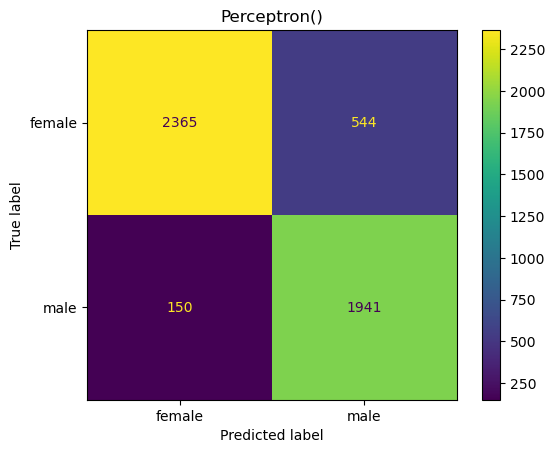

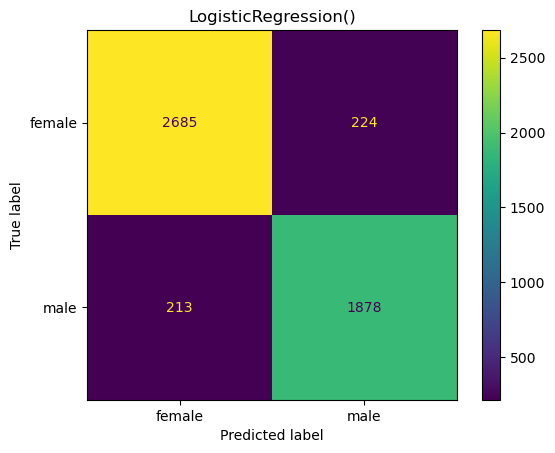

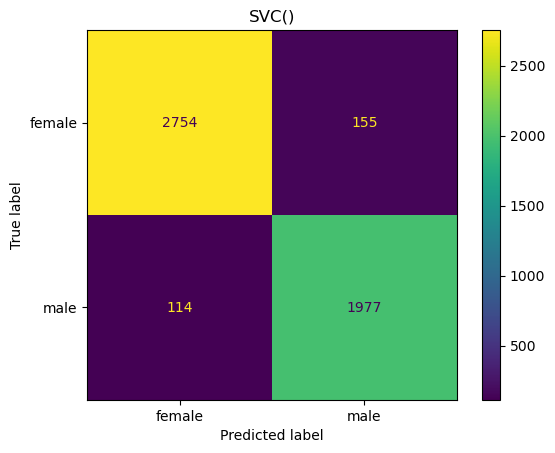

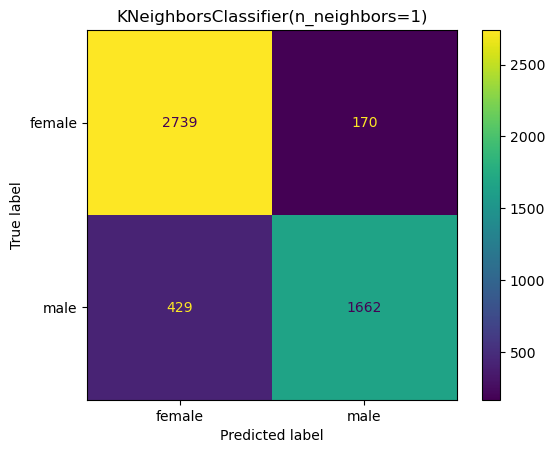

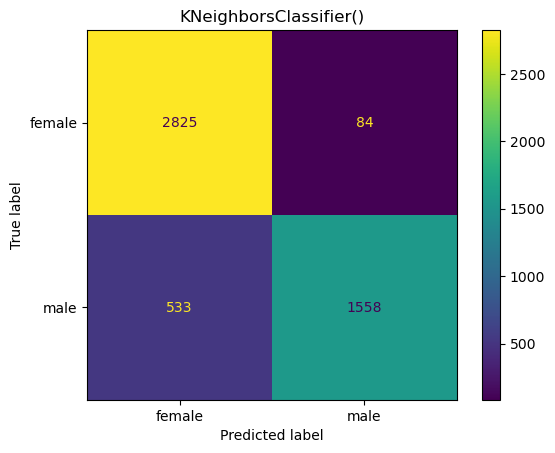

                       Clasificador  accuracy  recall  precision  especifidad  medida F1
                       Perceptron()     0.861   0.940      0.813        0.781      0.872
               LogisticRegression()     0.913   0.927      0.923        0.893      0.925
                              SVC()     0.946   0.960      0.947        0.927      0.953
KNeighborsClassifier(n_neighbors=1)     0.880   0.865      0.942        0.907      0.901
             KNeighborsClassifier()     0.877   0.841      0.971        0.949      0.902


In [16]:
clasif = [Perceptron(), LogisticRegression(), SVC(), KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier()]
tabla = []
matrix = []

for i in range(len(clasif)):
    tabla2 = []
    tabla2.append(clasif[i])
    
    clf = clasif[i]
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(clasif[i])
    plt.show()
    
    prec = cm[0,0]/(cm[0,0]+cm[1,0])
    recall = cm[0,0]/(cm[0,0]+cm[0,1])
    
    tabla2.append(round((cm[0,0]+cm[1,1])/len(y_test), 3))
    tabla2.append(round(prec, 3))
    tabla2.append(round(recall, 3))
    tabla2.append(round((cm[1,1])/(cm[1,1]+cm[0,1]),3))
    tabla2.append(round(2*((prec*recall)/(prec+recall)),3))
    
    matrix.append(cm)

    
    tabla.append(tabla2)

df = pd.DataFrame(tabla, columns=['Clasificador', 'accuracy', 'recall', 'precision', 'especifidad', 'medida F1'])
print(df.to_string(index=False))

- Analizando la tabla, observamos como el clacificador SVC, es el que tiene mejor tasa de acierto, sensibilidad y medida F1. Sin embargo tanto la especifidad como la precisión, el clasificador de vecino más cercano con n_neighbors = 5, es el mejor. A pesar de que el resto de clasificadores no destaca sobre los dos anteriormente mencionados, todos los clasificadores tienen una tasa de acierto por encima del 80%.

## Ejercicio 2: Espacio ROC.

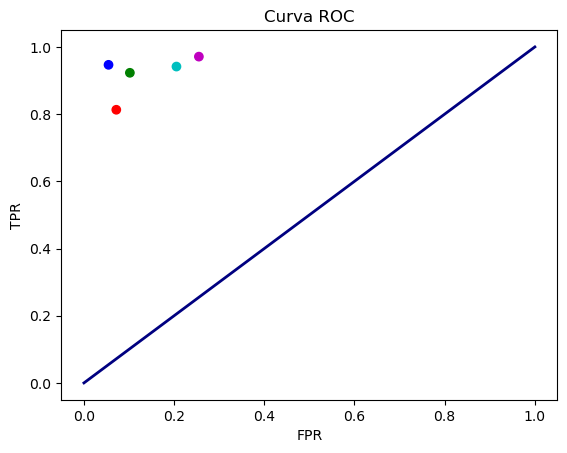

Leyenda:
 Perceptron = rojo
 LogisticRegression = verde
 SVC = azul
 KNeighborsClassifier(n_neighbors=1) = azul cian
 KNeighborsClassifier(n_neighbors=5) = morado



In [22]:
tpr, fpr = [],[]
for i in range(len(matrix)):
    cm = matrix[i]
    tpr.append(cm[0,0]/(cm[0,0]+cm[0,1]))
    fpr.append(cm[1,0]/(cm[1,1]+cm[1,0]))

colors = ['r', 'g', 'b', 'c', 'm']
ax = plt.subplot()
ax.scatter(fpr, tpr, c=colors)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

print('Leyenda:\n','Perceptron = rojo\n','LogisticRegression = verde\n','SVC = azul\n', 'KNeighborsClassifier(n_neighbors=1) = azul cian\n','KNeighborsClassifier(n_neighbors=5) = morado\n')

- Viendo la distibución de los puntos, y entendiendo como funciona el espacio ROC, analizamos que cada clasificador tiene una gran tasa de acierto, puesto que tienen un tpr elevado y un fpr (false postive rate) inferior al 50%. Además todos los clasificadores tienen un tpr (total positive rate) superior al 90% menos el Perceptrón.

## Ejercicio 3: Curva ROC.

In [24]:
clasif = [GaussianNB(), LogisticRegression(), SVC(probability=True)]
proba = []

for i in range(len(clasif)):
    
    clf = clasif[i].fit(x_train, y_train)
    proba.append(clf.predict_proba(x_test))